# Eigenvalue dan Eigenvector

## Pengertian

Eigenvalue (nilai eigen) dan eigenvector (vektor eigen) merupakan konsep dasar dalam aljabar linear yang berhubungan dengan transformasi linear.

Eigenvector adalah vektor tak-nol
*v*
yang arahannya tetap saat dikenai transformasi linear (matriks), namun hanya mengalami perubahan dalam hal "perenggangan" atau "penyusutan" oleh suatu faktor skalar
*λ*.

Eigenvalue (*λ*) adalah skalar yang menunjukkan besar perubahan skala tersebut.

Secara matematis, untuk matriks
A
A dan vektor
v
v:

Av=
λ
v
Av=λv

## Contoh: Matriks $A=\left[\begin{array}{ll}2 & 1 \\ 1 & 2\end{array}\right]$

### Langkah 1: Mencari Eigenvalue
Persamaan karakteristik:
$$
\operatorname{det}(A-\lambda I)=\operatorname{det}\left[\begin{array}{cc}
2-\lambda & 1 \\
1 & 2-\lambda
\end{array}\right]=(2-\lambda)^2-1=\lambda^2-4 \lambda+3=0
$$

Solusi: $\lambda_1=3, \lambda_2=1$.

### Langkah 2: Mencari Eigenvector
- Untuk $\lambda_1=3$ :
$
(A-3 I) \mathbf{v}=\left[\begin{array}{cc}
-1 & 1 \\
1 & -1
\end{array}\right] \mathbf{v}=\mathbf{0}
$

Solusi: $\mathbf{v}_1=\left[\begin{array}{l}1 \\ 1\end{array}\right]$.
- Untuk $\lambda_2=1$ :
$
(A-I) \mathbf{v}=\left[\begin{array}{ll}
1 & 1 \\
1 & 1
\end{array}\right] \mathbf{v}=\mathbf{0}
$

Solusi: $\mathbf{v}_2=\left[\begin{array}{c}1 \\ -1\end{array}\right]$

### Langkah 3: Normalisasi ke Ortonormal
- Norma $\mathbf{v}_1:\left\|\mathbf{v}_1\right\|=\sqrt{1^2+1^2}=\sqrt{2}$.
- $N o r m a \mathbf{v}_2:\left\|\mathbf{v}_2\right\|=\sqrt{1^2+(-1)^2}=\sqrt{2}$.

### Vektor ortonormal:
$$
\mathrm{u}_1=\frac{1}{\sqrt{2}}\left[\begin{array}{l}
1 \\
1
\end{array}\right], \quad \mathrm{u}_2=\frac{1}{\sqrt{2}}\left[\begin{array}{c}
1 \\
-1
\end{array}\right]
$$

In [ ]:
import numpy as np

# Definisi matriks
A = np.array([[2, 1], [1, 2]])

# Mencari eigenvalue dan eigenvector
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Normalisasi ke ortonormal (eigenvectors dari numpy sudah ortonormal)
u1 = eigenvectors[:, 0]
u2 = eigenvectors[:, 1]

# Verifikasi ortonormalitas
print("Dot product u1 dan u2:", np.dot(u1, u2))  # Output: 0 (ortogonal)
print("Norma u1:", np.linalg.norm(u1))
print("Norma u2:", np.linalg.norm(u2))

Eigenvalues: [3. 1.]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Dot product u1 dan u2: 0.0
Norma u1: 0.9999999999999999
Norma u2: 0.9999999999999999


##Penjelasan Kode

1. np.linalg.eig(A): Fungsi ini mengembalikan eigenvalue dan eigenvector yang sudah ternormalisasi.

2. eigenvectors[:, 0]: Kolom pertama matriks eigenvectors adalah eigenvector untuk eigenvalue pertama (3).

3. Verifikasi:

- Dot product = 0 → ortogonal.

- Norma = 1 → ortonormal.

Karena matriks
A
A simetris, eigenvectornya otomatis ortogonal, sehingga cukup dinormalisasi untuk mendapatkan basis ortonormal.

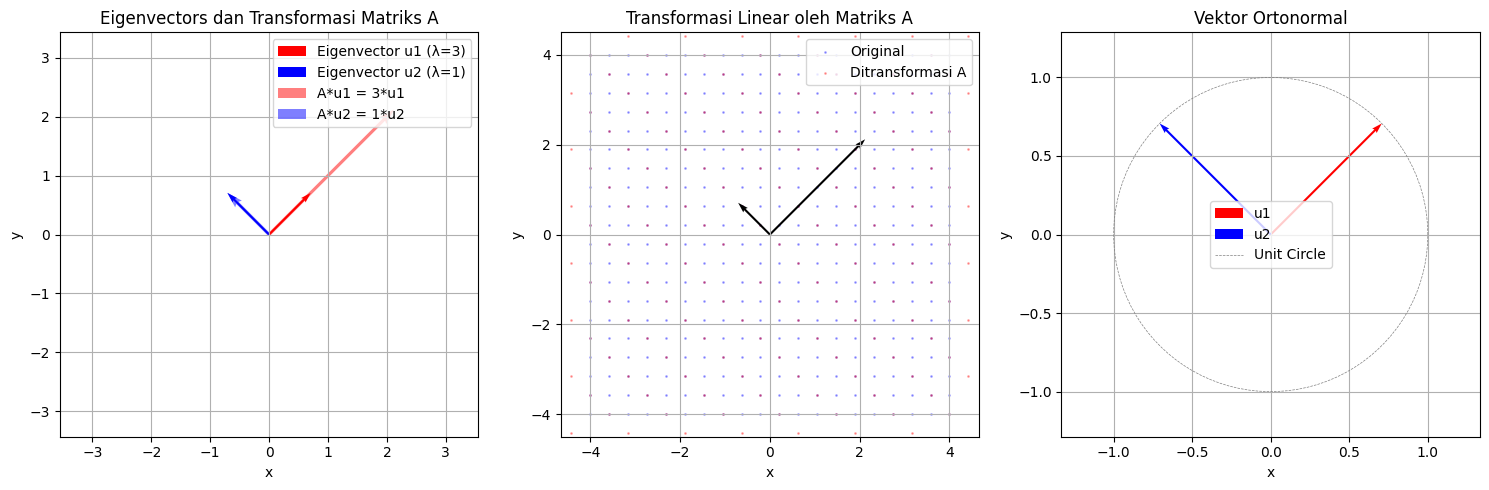

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Matriks A
A = np.array([[2, 1], [1, 2]])

# Mencari eigenvalue dan eigenvector
eigenvalues, eigenvectors = np.linalg.eig(A)
u1 = eigenvectors[:, 0]  # Eigenvector untuk λ=3
u2 = eigenvectors[:, 1]  # Eigenvector untuk λ=1

# Membuat grid untuk visualisasi transformasi
x = np.linspace(-4, 4, 20)
y = np.linspace(-4, 4, 20)
X, Y = np.meshgrid(x, y)
coordinates = np.vstack([X.ravel(), Y.ravel()])

# Transformasi grid oleh matriks A
transformed_coords = A @ coordinates

# Plot
plt.figure(figsize=(15, 5))

# -------------------------------------------
# Subplot 1: Eigenvectors dan Transformasi
# -------------------------------------------
plt.subplot(1, 3, 1)
plt.quiver(0, 0, u1[0], u1[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.005, label='Eigenvector u1 (λ=3)')
plt.quiver(0, 0, u2[0], u2[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.005, label='Eigenvector u2 (λ=1)')

# Transformasi eigenvector oleh A
A_u1 = A @ u1
A_u2 = A @ u2
plt.quiver(0, 0, A_u1[0], A_u1[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5, label='A*u1 = 3*u1')
plt.quiver(0, 0, A_u2[0], A_u2[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5, label='A*u2 = 1*u2')

plt.title('Eigenvectors dan Transformasi Matriks A')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend()

# -------------------------------------------
# Subplot 2: Visualisasi Transformasi Linear
# -------------------------------------------
plt.subplot(1, 3, 2)
plt.scatter(coordinates[0], coordinates[1], s=1, alpha=0.3, color='blue', label='Original')
plt.scatter(transformed_coords[0], transformed_coords[1], s=1, alpha=0.3, color='red', label='Ditransformasi A')

# Plot eigenvectors
plt.quiver(0, 0, 3*u1[0], 3*u1[1], angles='xy', scale_units='xy', scale=1, color='black', width=0.005)
plt.quiver(0, 0, 1*u2[0], 1*u2[1], angles='xy', scale_units='xy', scale=1, color='black', width=0.005)

plt.title('Transformasi Linear oleh Matriks A')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend()

# -------------------------------------------
# Subplot 3: Vektor Ortonormal
# -------------------------------------------
plt.subplot(1, 3, 3)
plt.quiver(0, 0, u1[0], u1[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.005, label='u1')
plt.quiver(0, 0, u2[0], u2[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.005, label='u2')

# Unit circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='grey', linewidth=0.5, label='Unit Circle')

plt.title('Vektor Ortonormal')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()

plt.tight_layout()
plt.show()


## Penjelasan Visualisasi
1. Subplot 1 (Kiri):

- Menampilkan eigenvector asli (u1 dan u2) dan hasil transformasinya oleh matriks A.

- Garis putus-putus menunjukkan hasil perkalian A*u1 dan A*u2 yang sejajar dengan eigenvector asli (karena hanya skala yang berubah).

- Pola: Eigenvector tidak berubah arah, hanya diskalakan oleh eigenvalue.

2. Subplot 2 (Tengah):

- Visualisasi transformasi linear oleh matriks A pada seluruh bidang.

- Titik biru: Posisi awal.

- Titik merah: Posisi setelah transformasi.

- Garis hitam: Arah dominan transformasi (sejajar dengan eigenvector).

3. Subplot 3 (Kanan):

- Vektor ortonormal u1 dan u2 yang terletak pada lingkaran satuan (norma = 1).

- Pola: Vektor saling tegak lurus (dot product = 0) dan memiliki panjang 1.